Para praticar os métodos aprendidos no decorrer dessa aula e também aprender novos, vamos realizar algumas análises utilizando um arquivo csv diferente: alunos.csv.

1) Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.

2) Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.

3) Confira a quantidade de linhas e colunas desse DataFrame.

4) Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.

Extra: Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc). Dica: pesquise pelo método describe.

In [107]:
alumnos = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

In [108]:
import pandas as pd

df = pd.read_csv(alumnos, sep=',')
df.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [109]:
df.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


In [110]:
df.shape

(18, 4)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [112]:
df.describe().round(2)

,Idade,Notas
count,18.00,12.00
mean,25.50,6.80
std,6.07,2.20
min,18.00,2.50
25%,21.00,5.45
50%,24.50,7.00
75%,28.75,8.25
max,37.00,10.00


## Practicando groupby

In [113]:
df = pd.DataFrame({
   'Animal': ['Cachorro', 'Gato', 'Elefante', 'Cachorro', 'Gato', 'Elefante'],
   'Cor': ['Preto', 'Branco', 'Cinza', 'Marrom', 'Preto', 'Marrom'],
   'Quantidade': [2, 3, 1, 4, 2, 2]
})
df

,Animal,Cor,Quantidade
0,Cachorro,Preto,2
1,Gato,Branco,3
2,Elefante,Cinza,1
3,Cachorro,Marrom,4
4,Gato,Preto,2
5,Elefante,Marrom,2


In [114]:
df.groupby('Animal')[['Quantidade']].sum()

,Quantidade
Animal,
Cachorro,6
Elefante,3
Gato,5


In [115]:
df.groupby(['Animal','Cor'])[['Quantidade']].sum()

Quantidade
Animal   Cor               
Cachorro Marrom           4
         Preto            2
Elefante Cinza            1
         Marrom           2
Gato     Branco           3
         Preto            2

Para saber mais: alterando os nomes de colunas
 
 Próxima Atividade

Quando trabalhamos com bases de dados, em alguns momentos, pode ser necessário fazermos alterações nos nomes das colunas. Por exemplo, quando criamos o seguinte DataFrame no nosso projeto:

In [116]:
df

,Animal,Cor,Quantidade
0,Cachorro,Preto,2
1,Gato,Branco,3
2,Elefante,Cinza,1
3,Cachorro,Marrom,4
4,Gato,Preto,2
5,Elefante,Marrom,2


Y quieramos cambiar el nombre de la columna Quantidade por Qtd. Podemos usar el metodo rename() y ademas usaremos el parametro inplace=True para que los cambios sean definitvos.

In [117]:
#Primero realizamos una copia
df_ejemplo = df.copy()
#Luego aplicamos los cambios sobre la copia
df_ejemplo.rename(columns={"Quantidade":"Qtd."}, inplace=True)
#Podemos ver el nuevo nombre de la columna
df

,Animal,Cor,Quantidade
0,Cachorro,Preto,2
1,Gato,Branco,3
2,Elefante,Cinza,1
3,Cachorro,Marrom,4
4,Gato,Preto,2
5,Elefante,Marrom,2


### Desafio: bora praticar?
 Próxima Atividade

O time de ML chegou com algumas demandas de última hora para resolvermos nesse momento da análise exploratória. Essas demandas são:

1) Calcular a média de quartos por apartamento;


In [118]:
url ='https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

In [119]:
df_inmobiliaria = pd.read_csv(url, sep=';')
tipo_apartamento = df_inmobiliaria.query("'Apartamento' in Tipo")
tipo_apartamento["Quartos"].mean()


np.float64(2.481568707761622)


2) Conferir quantos bairros únicos existem na nossa base de dados;


In [120]:
df_inmobiliaria.Bairro.value_counts().to_frame().query('count < 2').count()

count    9
dtype: int64


3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;


In [121]:
bairro_mean_alto = df_inmobiliaria.groupby(["Bairro"])["Valor"].mean().to_frame().sort_values("Valor").tail(5)
bairro_mean_alto.reset_index()

,Bairro,Valor
0,Cidade Nova,88166.692308
1,Vasco da Gama,120000.000000
2,Caju,120264.782609
3,Irajá,154610.470588
4,Jacarepaguá,314143.489637



4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

<Axes: xlabel='Bairros', ylabel='Medias'>

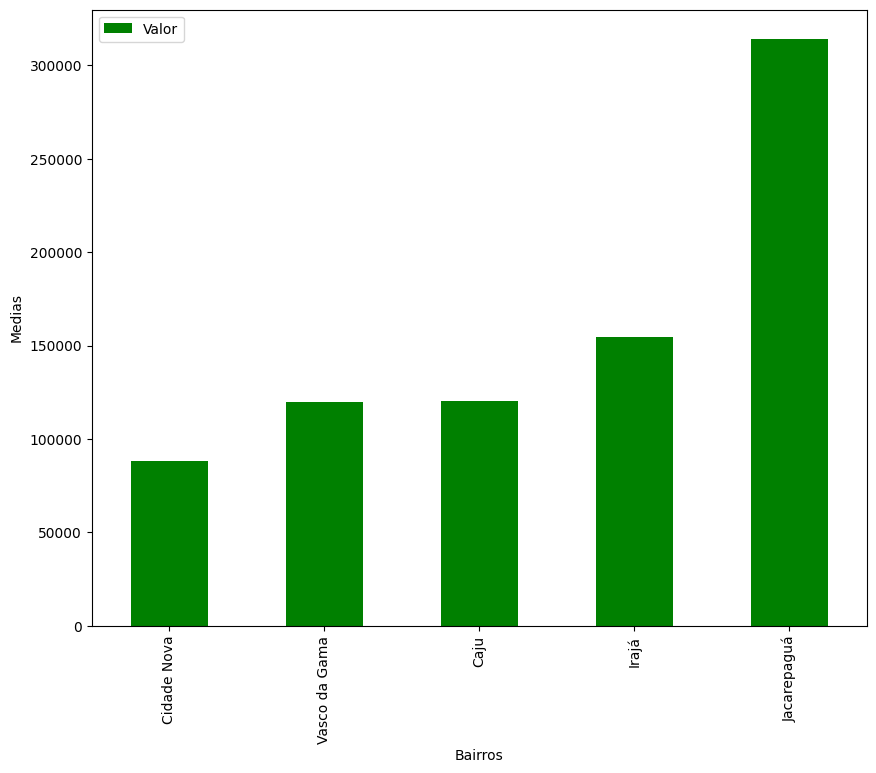

In [122]:
bairro_mean_alto.plot(kind="bar", figsize=(10,8), color="green", xlabel="Bairros", ylabel="Medias")

### Desafio: salvando os dados filtrados
 Próxima Atividade

Durante o desenvolvimento do nosso projeto, nós aplicamos alguns filtros na nossa base de dados e salvamos os DataFrames resultantes em diferentes variáveis, sendo elas: df_1 e df_2.

Com base nisso, salve esses DataFrames em 2 arquivos csv distintos para que o time de ML possa ter acesso a esses dados de forma mais prática.

In [123]:
tipo_apartamento.drop('Tipo', axis=1, inplace=True)

/tmp/ipykernel_2032/4038828043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipo_apartamento.drop('Tipo', axis=1, inplace=True)


In [124]:

seleccion = (tipo_apartamento['Quartos'] > 1) & (tipo_apartamento['Valor'] < 3000) & (tipo_apartamento['Area'] > 70)
filtro2 = tipo_apartamento[seleccion]
filtro2.to_csv('apartamentos_filtro2.csv', sep=';', index=False)

In [125]:
seleccion1 = (tipo_apartamento['Quartos'] > 1) & (tipo_apartamento['Valor'] < 1200)
filtro1 = tipo_apartamento[seleccion1]
filtro1.to_csv("apartamentos_filtro1.csv", sep=';', index=False)

Desafio: bora praticar?
 Próxima Atividade

Para praticar os métodos aprendidos no decorrer dessa aula e também aprender novos, vamos realizar alguns tratamentos e seleções utilizando um arquivo csv diferente: alunos.csv.

Esse arquivo é o mesmo utilizado para resolução dos desafios da aula 1 e possui dados referentes a alunos de um curso superior.

Com base nisso, solucione os problemas propostos abaixo utilizando os conhecimentos adquiridos até aqui.

1) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

3) Aplique um filtro que selecione apenas os alunos que foram aprovados.

4) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

In [126]:
url2 = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

In [127]:
df2 = pd.read_csv(url2, sep=',')
df2.rename(columns={"Quantidade":"Qtd"}, inplace=True)
df2

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


#### Verificar datos null

In [128]:
df2.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [129]:
df2 = df2.fillna(0)
df2

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


#### Remover registros

In [130]:
remover = df2.query('["Alice","Carlos"] in Nome').index

In [131]:
df2.drop(remover, axis=0, inplace=True)
df2

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


#### Filtro Aprobados

In [132]:
aprobo = df2['Aprovado'] == True
aprobados = df2[aprobo]
aprobados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


#### Guardar alumnos aprobados

In [133]:
aprobados.to_csv("alunos_aprovados.csv", index=False)

In [134]:
pd.read_csv('alunos_aprovados.csv')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


#### Extra

In [135]:
#Corrección 
aprobados_actualizados = aprobados.copy()

aprobados_actualizados['Notas'] = aprobados_actualizados['Notas'].replace(7, 8)
aprobados_actualizados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


###  Desafio: bora praticar?
 Próxima Atividade

Para praticar os métodos aprendidos no decorrer dessa aula e também aprender novos, vamos realizar alguns tratamentos e seleções utilizando um arquivo csv diferente: alunos.csv.

Esse arquivo é o mesmo utilizado para resolução dos desafios da aula 1 e 3 e possui dados referentes a alunos de um curso superior. Com base nisso, solucione os problemas propostos abaixo utilizando os conhecimentos adquiridos até aqui.

In [136]:
url3 = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dsf3 = pd.read_csv(url3)
dsf3.head(2)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False


1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

In [137]:
dsf3['Pontos_extras'] = dsf3['Notas'] * 0.4
dsf3.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
1,Ana,18,NaN,False,NaN
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0


2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.


In [138]:
dsf3['Notas_finais'] = dsf3['Notas'] + dsf3['Pontos_extras']
dsf3.head(2)

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,NaN,False,NaN,NaN


3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

In [139]:
dsf3['Aprovado_final'] = dsf3["Notas_finais"] >= 6
dsf3.head(4)

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,NaN,False,NaN,NaN,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True


4) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [140]:
dsf3.query('Aprovado == False & Aprovado_final == True')


,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True


In [141]:
dsf3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nome            18 non-null     object 
 1   Idade           18 non-null     int64  
 2   Notas           12 non-null     float64
 3   Aprovado        18 non-null     bool   
 4   Pontos_extras   12 non-null     float64
 5   Notas_finais    12 non-null     float64
 6   Aprovado_final  18 non-null     bool   
dtypes: bool(2), float64(3), int64(1), object(1)
memory usage: 888.0+ bytes


In [143]:
seleccion3 = (dsf3['Aprovado'] == False) & (dsf3['Aprovado_final'] == True)
dsf3_aprovado_extras = dsf3[seleccion3]
dsf3_aprovado_extras


,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
